# **모델 및 모듈 로딩**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('galaxy.csv')

In [3]:
data.head(3)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
BuyItNow                1485 non-null int64
startprice              1485 non-null float64
carrier                 1179 non-null object
color                   892 non-null object
productline             1485 non-null object
noDescription           1485 non-null object
charCountDescription    1485 non-null int64
upperCaseDescription    1485 non-null int64
sold                    1485 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='startprice', ylabel='Density'>

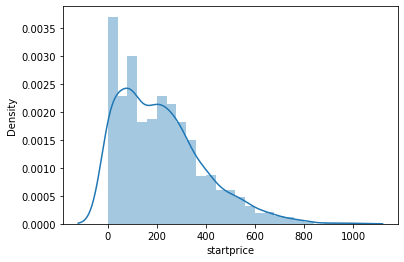

In [6]:
sns.distplot(data['startprice'])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

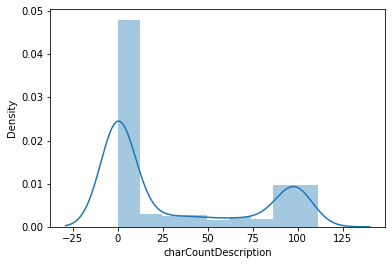

In [7]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

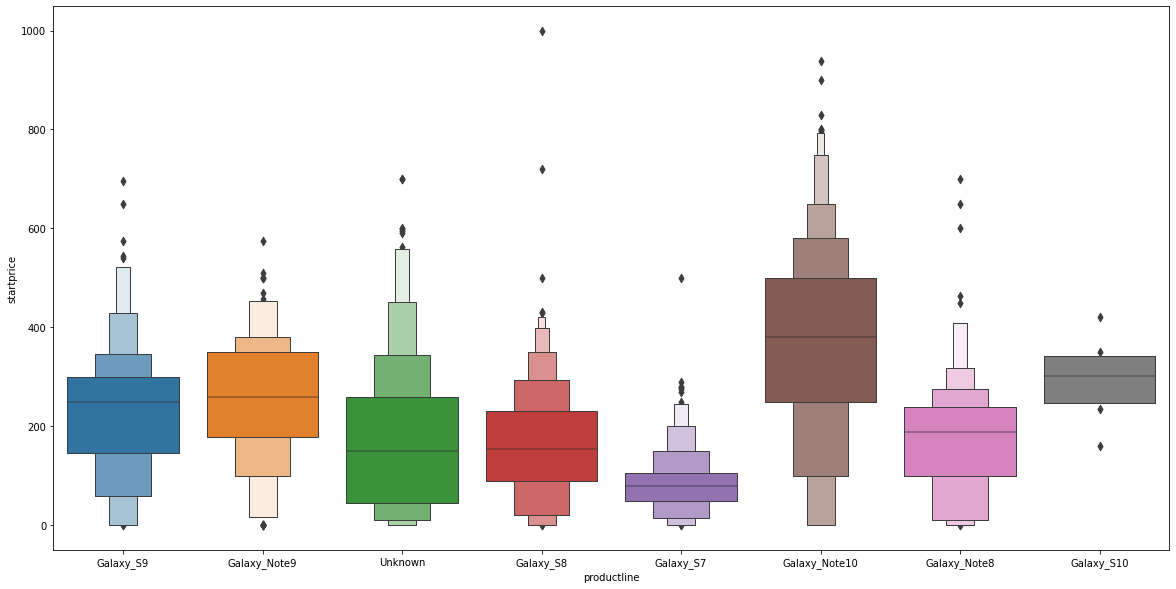

In [8]:
plt.figure(figsize = (20, 10))
sns.boxenplot(x = 'productline', y = 'startprice', data = data)

### **Missing Value 처리**

In [10]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [11]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [12]:
data = data.fillna('Unknown')

### **카테고리 변수 처리**

In [15]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [16]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [17]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [19]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [18]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [20]:
# Black 종류를 하나로 통합
def black(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black' : 
        return 'Black'
    else :
        return x

In [21]:
def black(x):
    if(x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):
        return 'Black'
    else:
        return x

In [23]:
def black(x):
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else :
        return x

In [24]:
data['color'] = data['color'].apply(lambda x : black(x))

In [25]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [26]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])

In [27]:
data.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## **Decision Tree 모델 만들기**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [33]:
model = DecisionTreeClassifier(max_depth = 10)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## **예측**

In [37]:
pred = model.predict(X_test)

## **평가**

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(y_test, pred)

0.8080808080808081

## **최적의 MaxDepth찾기**

In [41]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, ' : ', round(accuracy_score(y_test, pred), 3))

2  :  0.818
3  :  0.832
4  :  0.832
5  :  0.825
6  :  0.808
7  :  0.818
8  :  0.801
9  :  0.795
10  :  0.795
11  :  0.795
12  :  0.771
13  :  0.758
14  :  0.771
15  :  0.754
16  :  0.764
17  :  0.744
18  :  0.744
19  :  0.737
20  :  0.758
21  :  0.768
22  :  0.741
23  :  0.774
24  :  0.764
25  :  0.754
26  :  0.747
27  :  0.751
28  :  0.754
29  :  0.751
30  :  0.764


In [45]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test, pred), 3))
print(confusion_matrix(y_test, pred))

0.832
[[151  10]
 [ 40  96]]


# **Tree Plot**

In [46]:
from sklearn.tree import plot_tree

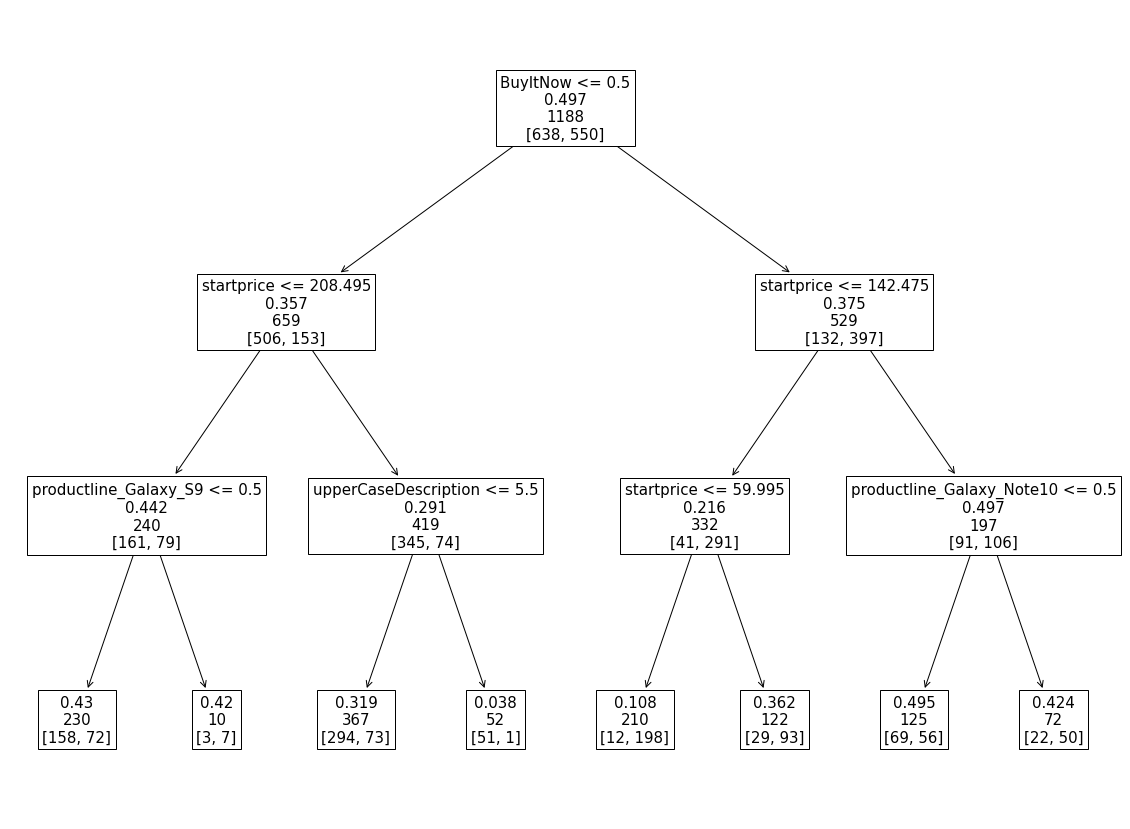

In [48]:
plt.figure(figsize = (20, 15))
plot_tree(model, feature_names = X_train.columns, fontsize = 15, label = 'None')
plt.show()